In [2]:
import sys
import WOS
import glob
import dbgz
import pandas as pd
import numpy as np

from pathlib import Path
from tqdm.auto import tqdm

from collections import Counter
from itertools import combinations

In [11]:
processedPath = Path("../../WoS/Data/Processed/")

WoSPaperCitationDataFilepath = processedPath/"WoSPaperCitationData.bgz"
WoSPaperCitationDataIndexByIDFilepath = processedPath/"WoSPaperCitationData_indexByID.ibgz"
WoSPaperCitationDataIndexByVenueFilepath = processedPath/"WoSPaperCitationData_indexByVenue.ibgz"
WoSPaperCitationDataIndexByCategoriesFilepath = processedPath/"WoSPaperCitationData_indexByCategories.ibgz"
WoSPaperCitationDataIndexByReferencesFilepath = processedPath/"WoSPaperCitationData_indexByReferences.ibgz"

WoSPaperCitationDataIndexByVenueOnlyChemistryFilepath = processedPath/"WoSPaperCitationData_indexByVenue_onlyChemistry.ibgz"

In [41]:
# run: python wos_categories.py

In [76]:
papers_journals = pd.read_csv('paper_journals_cat_v2_temp.csv', sep='\t', header=None)
papers_journals.columns = ['journal', 'id', 'year', 'categories', 'refs']
c.iloc[0].categories


'Chemistry, Multidisciplinary;Chemistry, Physical;Materials Science, Multidisciplinary'

In [77]:
papers_journals.iloc[0].journal

'Langmuir'

In [78]:
minyear = papers_journals.year.min()
maxyear = papers_journals.year.max()

In [81]:
print(minyear)

1985


In [3]:
divs = pd.read_csv('divs_comp_180122.csv', header=None)
divs.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,ACS Appl. Mater. Interfaces,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,...,16.899,18.196,19.527,17.903,18.016,19.275,20.995,21.810,22.462,NaN
1,ACS Nano,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,...,16.207,17.189,19.266,18.937,18.714,19.725,20.436,20.943,21.062,NaN
2,Nano Lett.,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.449,11.865,13.956,...,18.000,17.836,19.142,18.539,17.998,18.300,18.479,18.671,18.647,NaN
3,Nat. Nanotechnol.,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,...,20.477,20.871,21.374,21.255,20.430,20.503,20.470,21.006,21.030,NaN
4,Nat. Mater.,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.000,5.282,15.057,...,19.839,19.514,20.944,20.258,20.691,21.046,21.081,21.297,21.174,NaN


In [4]:
x = np.arange(1995, 2021)
divs.columns = ['journal'] + x.tolist()
divs.journal = divs.journal.str.capitalize()
divs = divs.sort_values('journal')

In [5]:
divs.head()

,journal,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Acs appl. mater. interfaces,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,16.899,18.196,19.527,17.903,18.016,19.275,20.995,21.810,22.462,NaN
1,Acs nano,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,16.207,17.189,19.266,18.937,18.714,19.725,20.436,20.943,21.062,NaN
9,Adv. funct. mater.,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,9.028,11.762,12.668,...,17.140,16.619,18.863,17.802,17.822,18.097,18.914,19.010,18.893,NaN
10,Adv. mater.,14.312,14.151,13.867,14.082,13.967,14.628,14.406,13.911,13.687,...,17.259,17.245,18.628,17.760,17.561,17.894,18.225,18.354,18.419,NaN
12,Chem. mat.,12.398,12.421,11.775,12.134,13.297,12.999,12.992,12.586,13.195,...,17.624,17.631,18.578,17.951,17.638,17.950,18.552,18.583,18.564,NaN


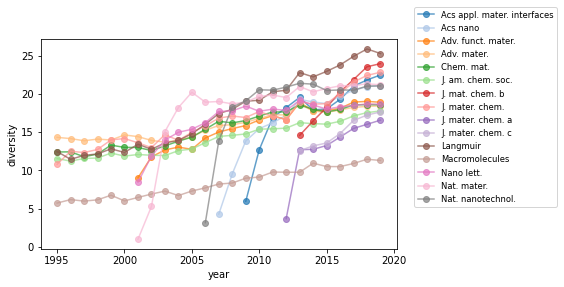

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = (8, 4)

color = iter(cm.get_cmap('tab20')(np.arange(len(divs))))
for _, row in divs.iterrows():
    x = 1995
    X = []
    Y = []
    for col in row[1:]:
        if col > 0:
            X.append(x)
            Y.append(col)
        x += 1
    c = next(color)
    plt.plot(X, Y, 'o-', label=row.journal, alpha=0.7, c=c)
            
plt.legend(fontsize='small', loc=(1.05, 0.2))
plt.xlabel('year')
plt.ylabel('diversity')
plt.tight_layout()
plt.savefig('div_papers_compl_200722.pdf')

In [ ]:
# fazer ano a ano done
# até 2020 done
# todas as revistas da acs + Journal of Materials Chemistry A B C ?????????? qual o nome ou issn?